In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def imshow(image):
    cv.imshow('image', image)
    cv.waitKey(0) 
    cv.destroyWindow('image')

#### Basics

Морфологические операции, это набор операций, которые выполняются над (как правило) бинарным изображением, с целью его модификации.  
Они берут исходное изображение, ядро и особым образом применяют это ядро к изображению. Базовых операций 2 штуки - эрозия и наращивание.  
Их комбинации дают еще несколько других операций. Выбор ядра так же определяет результат операции. Они в теории могут быть произвольными,  
но как правило используются квадрат, крест и эллипс 

#### Erosion

Эрозия принимает ядро и двигает его по изображению. Пиксель выходного изображения будет равен 1 только если, когда центр ядра находился на этом пикселе  
все остальные пиксели под ядром тоже были 1. Таким образом мы стираем границы объектов на исходном изображении

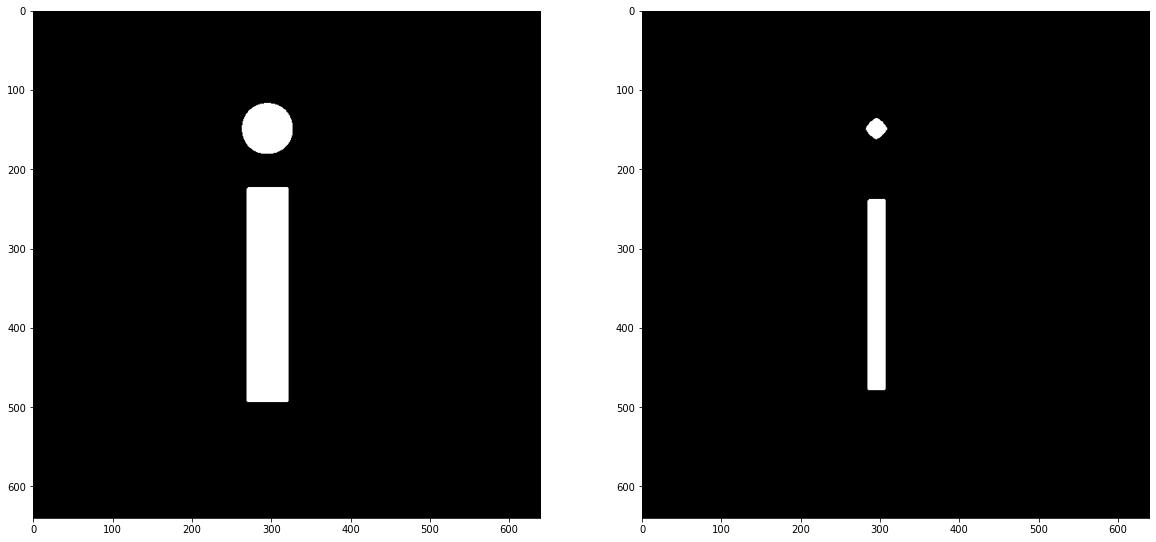

In [30]:
img = cv.imread("./ph/letter.jpg")
img = cv.resize(img, (640,640))
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
kernel = np.ones((11,11), np.uint8)
img = thresh
erosion = cv.erode(img, kernel, iterations=3)
f = plt.figure(figsize = (20,20))
f.add_subplot(121)
plt.imshow(img, cmap = "gray")
f.add_subplot(122)
plt.imshow(erosion, cmap = "gray")

#### Dilation

Наращивание это обратная эрозии операция. Структурный элемент(ядро) так же двигается по картинке, но при это если хотя бы один пиксель под ненулевым  
элементом ядра != 0, но все пиксели под остальными элементами ядра тоже становятся 1

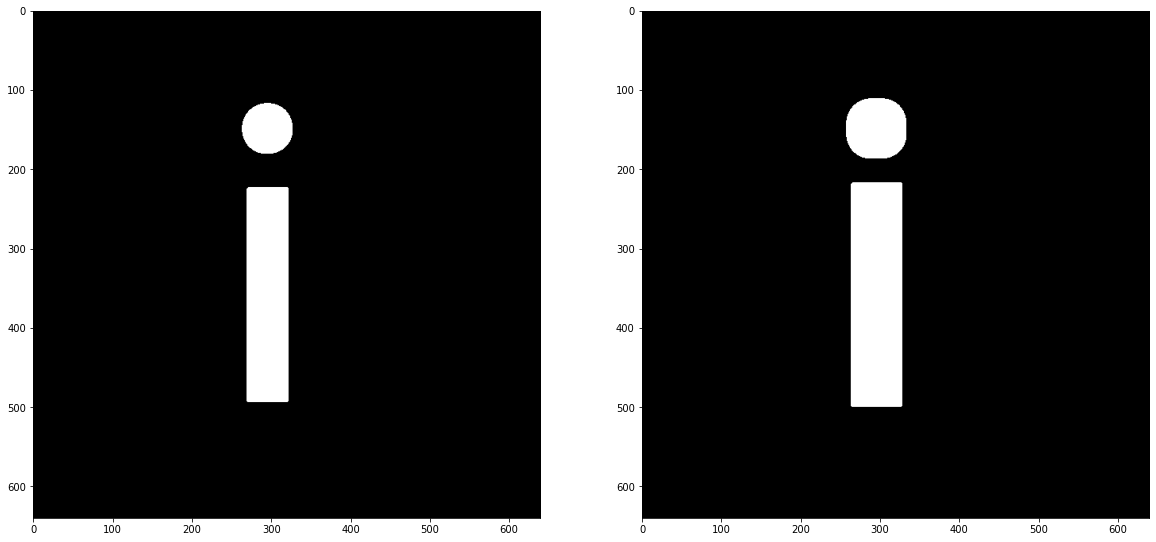

In [31]:
img = cv.imread("./ph/letter.jpg")
img = cv.resize(img, (640,640))
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
kernel = np.ones((5,5), np.uint8)
img = thresh
erosion = cv.dilate(img, kernel, iterations=3)
f = plt.figure(figsize = (20,20))
f.add_subplot(121)
plt.imshow(img, cmap = "gray")
f.add_subplot(122)
plt.imshow(erosion, cmap = "gray")

#### Opening

Это комбинация эрозии и наращивания. Помогает избавиться от шумов.

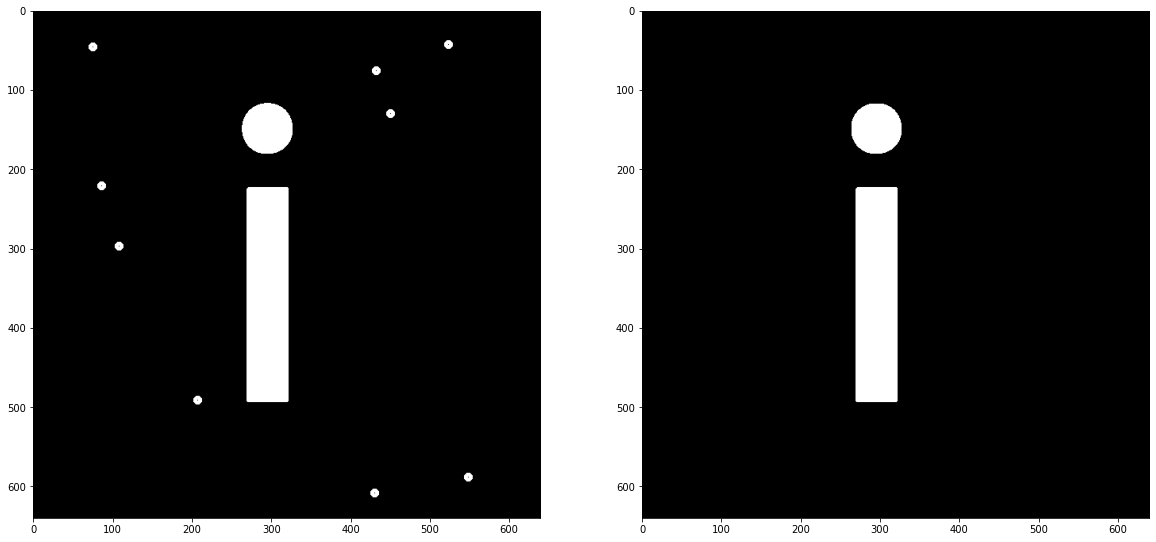

In [61]:
img = cv.imread("./ph/letter.jpg")
img = cv.resize(img, (640,640))
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
img =  thresh
# adding noise
points = [np.random.randint(0, img.shape[0]-1, 2).tolist() for i in range(10)]
for point in points:
    cv.circle(img, (point[0],point[1]), radius=3,thickness=3, color = (255,255,255))
kernel = np.ones((11,11), np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
f = plt.figure(figsize = (20,20))
f.add_subplot(121)
plt.imshow(img, cmap = "gray")
f.add_subplot(122)
plt.imshow(opening, cmap = "gray")

#### Closing

Замыкание похоже на разсмыкание, за тем исключением, что оно закрывает черные дыры в исходном изображении. Выполняется сначала наращиванием, а потом эрозией

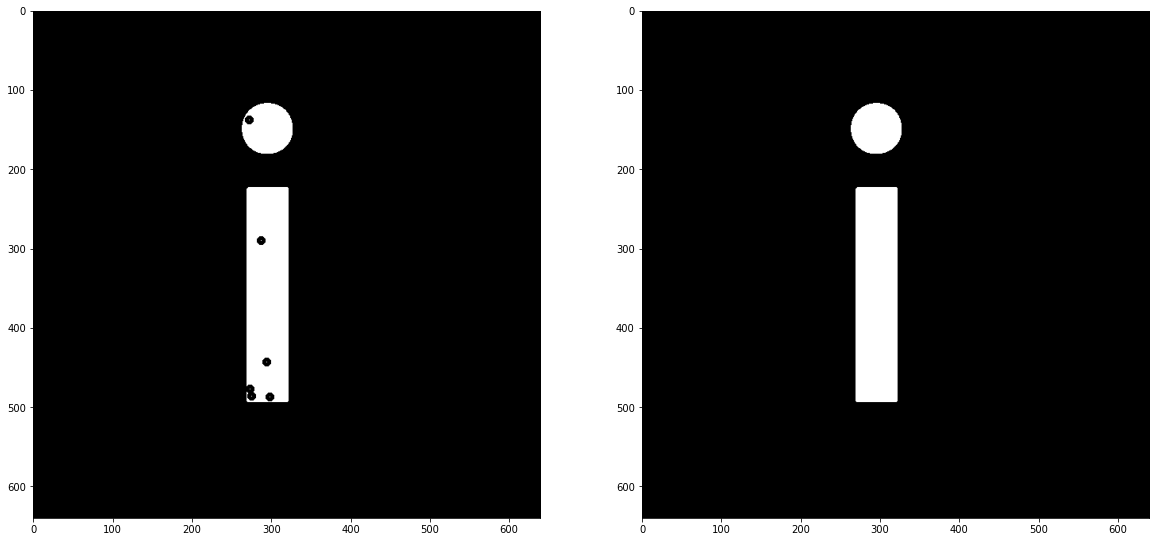

In [63]:
img = cv.imread("./ph/letter.jpg")
img = cv.resize(img, (640,640))
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
img =  thresh
# adding noise
points = [np.random.randint(0, img.shape[0]-1, 2).tolist() for i in range(100)]
for point in points:
    cv.circle(img, (point[0],point[1]), radius=3,thickness=3, color = (0,0,0))
kernel = np.ones((11,11), np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
f = plt.figure(figsize = (20,20))
f.add_subplot(121)
plt.imshow(img, cmap = "gray")
f.add_subplot(122)
plt.imshow(closing, cmap = "gray")

#### Morhological Gradient

Это математическая разница между наращиванием и эрозией. Даст нам границы объекта

In [ ]:
img = cv.imread("./ph/letter.jpg")
img = cv.resize(img, (640,640))
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
img =  thresh
kernel = np.ones((11,11), np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
f = plt.figure(figsize = (20,20))
f.add_subplot(121)
plt.imshow(img, cmap = "gray")
f.add_subplot(122)
plt.imshow(closing, cmap = "gray")